<a href="https://colab.research.google.com/github/rutasnim/Mountain_webscrapping/blob/main/Mountain_scrapper_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping and Analyzing List of highest mountains on Earth 
In this notebook, I scrapped data from [wikipedia](https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth) containing List of highest mountains on Earth using beautifulsoup and request. 

I loaded the scrapped data in pandas dataframe and performed exploratory data analysis.

## 1. Web Scraping 

In [ ]:
# Importing the required libraries
import requests
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

!pip install geopandas
import geopandas as gpd

###  Downloading URL using requests


In [ ]:
# Downloading contents of the web page
url = "https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth"
data = requests.get(url).text

### Creating BeautifulSoup object

In [ ]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [ ]:
# Verifying tables and their classes
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))


Classes of each table:
['box-Original_research', 'plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-Original_research']
['noprint', 'infobox']
['wikitable', 'sortable']


In [ ]:
# Our piece of code tells us we want the second table (aka. class = ‘wikitable’ and ‘sortable’)
#  Looking for the table with the classes 'wikitable' and 'sortable'
table = soup.find('table', class_='wikitable sortable')

### Data Collection & Extraction

In [ ]:
# Defining of the dataframe
df = pd.DataFrame(columns=['Rank','Mountain_name','Height_m', 'Height_ft', 'Prominence_m', 'Prominence_ft',
                                        'Range','Coordinates', 'Parent_mountain','Succesful_attempt_yr',
                                        'Succesful_attempts', 'Failed_attempts','Country'])

# Collecting data
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    col = row.find_all('td')
    # Extracting data . .text removes the tags from entries.
    # done additional stripping and breaking down.
    if(col != []):
        rank =col[0].text.strip()
        name = col[1].a.text.strip()
        height_m = col[2].text.strip()
        height_ft= col[3].text.split("[")[0].strip()
        prominence_m =col[4].text.strip()
        prominence_ft= col[5].text.strip()
        Range = col[6].text.split()
        coordinates = col[7].text.split('/')[0]
        parent_mountain=col[8].text.strip()
        first_attempt=col[9].text.strip()
        success_attempts= col[10].text.split("[")[0].strip()
        failed_attempts=col[11].text.strip().split("[")[0].strip()
        #Country column extraction
        anchors=col[12].find_all("a")
        
        l=[]
        for x in anchors:
            l.append((x.text.strip("[dp0123456789]")).strip(''))
            Country=[]
            for element in l:
                if element.strip():
                    Country.append(element)
        # appending the rows in the df
        df = df.append({'Rank': rank, 'Mountain_name': name,'Height_m':height_m,'Height_ft': height_ft,
                    'Prominence_m': prominence_m,'Prominence_ft': prominence_ft,'Range':Range,
                    'Coordinates': coordinates,'Parent_mountain':parent_mountain,
                    'Succesful_attempt_yr': first_attempt,'Succesful_attempts':success_attempts,
                    'Failed_attempts': failed_attempts,'Country':Country}, ignore_index=True)

In [ ]:
df.head()

,Rank,Mountain_name,Height_m,Height_ft,Prominence_m,Prominence_ft,Range,Coordinates,Parent_mountain,Succesful_attempt_yr,Succesful_attempts,Failed_attempts,Country
0,1,Mount Everest,"8,848","29,029","8,848","29,029","[Mahalangur, Himalaya]",".mw-parser-output .geo-default,.mw-parser-outp...",—,1953,145,121,"[Nepal, China]"
1,2,K2,"8,611","28,251","4,020","13,190","[Baltoro, Karakoram]",35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44,"[Pakistan, China]"
2,3,Kangchenjunga,"8,586","28,169","3,922","12,867","[Kangchenjunga, Himalaya]",27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24,"[Nepal, India]"
3,4,Lhotse,"8,516","27,940",610,"2,000","[Mahalangur, Himalaya]",27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26,"[China, Nepal]"
4,5,Makalu,"8,485","27,838","2,378","7,802","[Mahalangur, Himalaya]",27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,—,"[Nepal, China]"


In [ ]:
df.tail()

,Rank,Mountain_name,Height_m,Height_ft,Prominence_m,Prominence_ft,Range,Coordinates,Parent_mountain,Succesful_attempt_yr,Succesful_attempts,Failed_attempts,Country
115,104,Noijin Kangsang,"7,206","23,642","2,160","7,090","[Nagarze, Himalaya]",28°56′48″N 90°10′42″E﻿,Gangkhar Puensum,1986,4,1,[China]
116,105,Langtang Ri,"7,205","23,638",665,"2,182","[Langtang, Himalaya]",28°22′53″N 85°41′01″E﻿,Shishapangma,1981,4,0,"[Nepal, China]"
117,106,Kangphu Kang,"7,204","23,635","1,244","4,081","[Lunana, Himalaya]",28°09′24″N 90°04′15″E﻿,Tongshanjiabu,2002,1,0,"[Bhutan, China]"
118,107,Singhi Kangri,"7,202","23,629",730,"2,400","[Siachen, Karakoram]",35°35′59″N 76°59′01″E﻿,Teram Kangri III,1976,2,0,"[India, China]"
119,108,Lupghar Sar,"7,200","23,600",730,"2,400","[Hispar, Karakoram]",36°21′01″N 75°02′13″E﻿,Momhil Sar,1979,1,0,[Pakistan]


## 2. Data Cleaning & Transformation
- In our scraped data, in the first row "Coordinates" column did not get the correct format of coordinates (mw-parser-output .geo-default,.mw-parser-output...) , Therefore, we are  manually changing the coordinates with the right coordinates. 


In [ ]:
df['Coordinates'].loc[df['Mountain_name']=='Mount Everest']='27°59′17″N 86°55′31″E'

### Convert Degree Minute Seconds (DMS) Co-ordinates into Latitude and Longitude Co-ordinates 

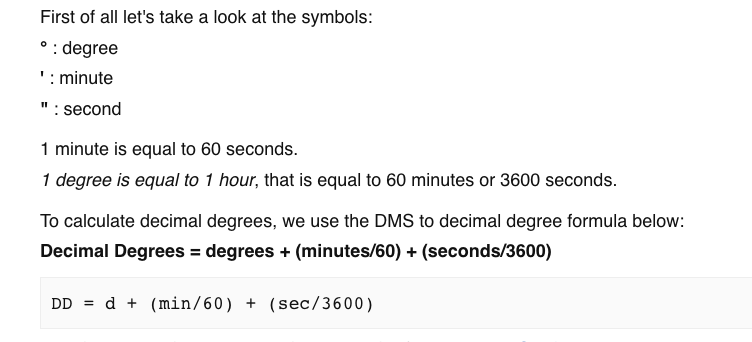


In [ ]:
# split them into long and latitute 
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(' ', 1, expand=True)

#Convert the long and lat using the formula:

def dms2dd(s):
    # this function convert convert the cordinates using the formula above 
    result= re.split(r"[\b\W\b]+", s)   #splits on non-alphanumeric characters
    degrees, minutes, seconds, direction = list(filter(None,result)) #filter empty values
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);  #formula for conversion
    if direction in ('S','W'):           # If south/ west, lat long gets multiply by -1
        dd*= -1
    return dd

df['Latitude'] = df['Latitude'].apply(dms2dd)
df['Longitude'] = df['Longitude'].apply(dms2dd)


In [ ]:
#Let's check the co-ordinta conversion
df[['Coordinates', 'Latitude', 'Longitude']][:5]

,Coordinates,Latitude,Longitude
0,27°59′17″N 86°55′31″E,27.988056,86.925278
1,35°52′53″N 76°30′48″E﻿,35.881389,76.513333
2,27°42′12″N 88°08′51″E﻿,27.703333,88.147500
3,27°57′42″N 86°55′59″E﻿,27.961667,86.933056
4,27°53′23″N 87°05′20″E﻿,27.889722,87.088889



#### ```RANK``` Column has "S" values for same Rank as the previous row:


In [ ]:
x='S'
df.query('Rank==@x')[:5]

,Rank,Mountain_name,Height_m,Height_ft,Prominence_m,Prominence_ft,Range,Coordinates,Parent_mountain,Succesful_attempt_yr,Succesful_attempts,Failed_attempts,Country,Latitude,Longitude
15,S,Gasherbrum III,"7,946","26,070",355,"1,165","[Baltoro, Karakoram]",35°45′33″N 76°38′30″E﻿,Gasherbrum II,1975,2,2,"[Pakistan, China]",35.759167,76.641667
21,S,Nuptse,"7,864","25,801",305,"1,001","[Mahalangur, Himalaya]",27°58′03″N 86°53′13″E﻿,Lhotse,1961,5,12,[Nepal],27.967500,86.886944
35,S,Molamenqing,"7,703","25,272",433,"1,421","[Langtang, Himalaya]",28°21′18″N 85°48′35″E﻿,Shishapangma,1981,1,0,[China],28.355000,85.809722
39,S,Dhaulagiri IV,"7,661","25,135",469,"1,539","[Dhaulagiri, Himalaya]",28°44′09″N 83°18′55″E﻿,Dhaulagiri II,1975,2,10,[Nepal],28.735833,83.315278
41,S,Dhaulagiri V,"7,618","24,993",340,"1,120","[Dhaulagiri, Himalaya]",28°44′02″N 83°21′41″E﻿,Dhaulagiri IV,1975,2,3,[Nepal],28.733889,83.361389


**Changing "S" Values in ```Rank``` column to number as the previous row values:**

In [ ]:
rank=[]
for i, row in df.iterrows():
  #print(i, row['Rank'])
  if row['Rank']=='S':
    rank.append(df._get_value(i-1, 'Rank'))
  
  else:
    rank.append(row['Rank'])

#rank
df['Rank']=rank
    

In [ ]:
print(df.dtypes)

Rank                     object
Mountain_name            object
Height_m                 object
Height_ft                object
Prominence_m             object
Prominence_ft            object
Range                    object
Coordinates              object
Parent_mountain          object
Succesful_attempt_yr     object
Succesful_attempts       object
Failed_attempts          object
Country                  object
Latitude                float64
Longitude               float64
dtype: object


In [ ]:
#change the data types for the following columns
df['Height_m']=df['Height_m'].str.replace(',', '').astype(float)
df['Height_ft']=df['Height_ft'].str.replace(',', '').astype(float)

df['Prominence_m']=df['Prominence_m'].str.replace(',', '').astype(float)
df['Prominence_ft']=df['Prominence_ft'].str.replace(',', '').astype(float)

# take out "none" and convert to float
df['Succesful_attempt_yr']=df['Succesful_attempt_yr'].str.replace("none", '')
df['Succesful_attempt_yr']=pd.to_numeric(df['Succesful_attempt_yr'],downcast="integer")

df['Succesful_attempts']=df['Succesful_attempts'].str.replace("many", '')
df['Succesful_attempts']=df['Succesful_attempts'].str.replace( "—",'')
df['Succesful_attempts']=pd.to_numeric(df['Succesful_attempts'],downcast="integer")

df['Failed_attempts']=df['Failed_attempts'].str.replace("many", '')
df['Failed_attempts']=df['Failed_attempts'].str.replace("—",'')
df['Failed_attempts']=pd.to_numeric(df['Failed_attempts'],downcast="integer")
df['Rank']=pd.to_numeric(df['Rank'])


In [ ]:
# Display data types
print(df.dtypes)

Rank                      int64
Mountain_name            object
Height_m                float64
Height_ft               float64
Prominence_m            float64
Prominence_ft           float64
Range                    object
Coordinates              object
Parent_mountain          object
Succesful_attempt_yr    float64
Succesful_attempts      float64
Failed_attempts         float64
Country                  object
Latitude                float64
Longitude               float64
dtype: object


In [ ]:
#Changing data types float to int
df['Succesful_attempt_yr'] = df['Succesful_attempt_yr'].astype('Int64')
df['Failed_attempts'] = df['Failed_attempts'].astype('Int64')
df['Succesful_attempts'] = df['Succesful_attempts'].astype('Int64')


In [ ]:
# Display data types
print(df.dtypes)

Rank                      int64
Mountain_name            object
Height_m                float64
Height_ft               float64
Prominence_m            float64
Prominence_ft           float64
Range                    object
Coordinates              object
Parent_mountain          object
Succesful_attempt_yr      Int64
Succesful_attempts        Int64
Failed_attempts           Int64
Country                  object
Latitude                float64
Longitude               float64
dtype: object


## 3. Data Analysis
Exploratory data analysis is an important step to analyze the data.
- Summarize main characteristics
- Visualize data distribution
- Handle missing values and outliers
- Form hypotheses 

### 1. Summarize Main Characteristics

In [ ]:
# Display the size of the dataset
print(df.shape)

(120, 15)


In [ ]:
# Display data types
print(df.dtypes)

Rank                      int64
Mountain_name            object
Height_m                float64
Height_ft               float64
Prominence_m            float64
Prominence_ft           float64
Range                    object
Coordinates              object
Parent_mountain          object
Succesful_attempt_yr      Int64
Succesful_attempts        Int64
Failed_attempts           Int64
Country                  object
Latitude                float64
Longitude               float64
dtype: object


In [ ]:
#check for missing values
df.isnull().sum()

Rank                    0
Mountain_name           0
Height_m                0
Height_ft               0
Prominence_m            0
Prominence_ft           0
Range                   0
Coordinates             0
Parent_mountain         0
Succesful_attempt_yr    4
Succesful_attempts      4
Failed_attempts         4
Country                 0
Latitude                0
Longitude               0
dtype: int64

### Unconquered mountains 
While checking for missing values, we find that there are 4 values in First_attempt_year. :

▶ **There are 4 high mountains out of the top 120 highest mountain that have not been conquered yet!!**




Lets find out those unconquered mountain names and locations

In [ ]:
df1=df.loc[df['Succesful_attempt_yr'].isnull()]
df1[['Rank', 'Mountain_name', 'Height_m','Country']]

,Rank,Mountain_name,Height_m,Country
44,40,Gangkhar Puensum,7570.0,"[Bhutan, China]"
104,93,Labuche Kang III,7250.0,[China]
110,99,Karjiang,7221.0,[China]
113,102,Tongshanjiabu,7207.0,"[Bhutan, China]"


### Which mountain was the earliest to be conquered?


In [ ]:
print('The first high mountain was conquered in the year:')
df['Succesful_attempt_yr'].min()

The first high mountain was conquered in the year:


1930

**▶The first high mountain was conquered in the year:
1930**

In [ ]:
df2=df.dropna().nsmallest(5,'Succesful_attempt_yr')
df2[['Rank','Mountain_name', 'Country', 'Succesful_attempt_yr', 'Failed_attempts']]

,Rank,Mountain_name,Country,Succesful_attempt_yr,Failed_attempts
62,57,Jongsong Peak,"[India, China, Nepal]",1930,3
30,29,Kamet,[India],1931,14
45,41,Gongga Shan,[China],1932,7
69,63,Sia Kangri,"[Pakistan, China]",1934,0
112,101,Khartaphu,[China],1935,0


Looks like the early mountain that was conquered in 1930s were not in the top 10 high mountains. 





**Lets find out when high eight thousand meter mountains  were climbed first time:**

In [ ]:
df.query("Height_m >8000")[['Rank', 'Mountain_name','Country', 'Succesful_attempt_yr']].sort_values(by='Succesful_attempt_yr',ascending=True)

,Rank,Mountain_name,Country,Succesful_attempt_yr
9,10,Annapurna I,[Nepal],1950
0,1,Mount Everest,"[Nepal, China]",1953
8,9,Nanga Parbat,[Pakistan],1953
1,2,K2,"[Pakistan, China]",1954
5,6,Cho Oyu,"[China, Nepal]",1954
2,3,Kangchenjunga,"[Nepal, India]",1955
4,5,Makalu,"[Nepal, China]",1955
3,4,Lhotse,"[China, Nepal]",1956
7,8,Manaslu,[Nepal],1956
12,13,Gasherbrum II,"[Pakistan, China]",1956


▶***By 1950s, all 8000 meters mountains had been climbed starting with Mt. Annapurna in 1950.***

### First successful attempt of the mountain year distribution

The year the most mountains has been conquered:


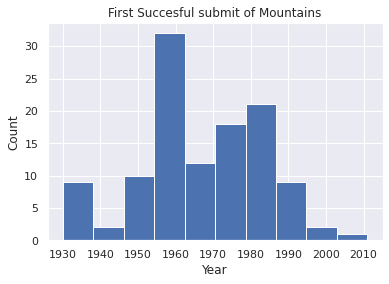

In [ ]:
sns.set()
yr = np.array(df['Succesful_attempt_yr'].dropna())
plt.hist(yr)
plt.title("First Succesful submit of Mountains")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

▶**Of all the high mountains, most mountains were climbed in the 1960s.**

▶ **1950s-1990s majority of the high moutains were conquered**

### Height Distribution

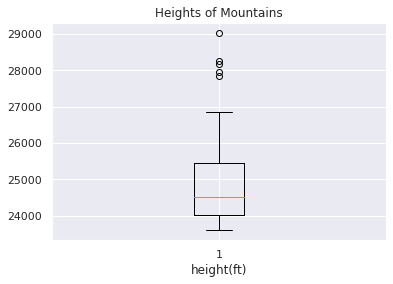

In [ ]:
plt.boxplot(height)
plt.title("Heights of Mountains")
plt.xlabel("height(ft)")
plt.show()

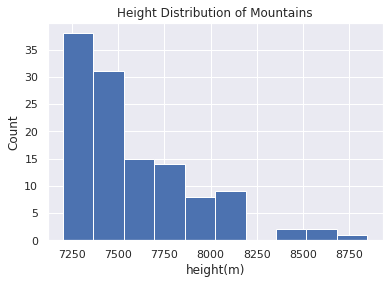

In [ ]:
height = np.array(df['Height_m'])
plt.hist(height)
plt.title("Height Distribution of Mountains")
plt.xlabel("height(m)")
plt.ylabel("Count")
plt.show()

▶ **Mountain above 8000m are outliers.**





### Which countries have the most high mountains?

In [ ]:
def to_1D(series):
  return pd.Series([x for _list in series for x in _list])

df_=to_1D(df['Country']).value_counts()
df_

China          50
Pakistan       42
Nepal          34
India          26
Bhutan          5
Tajikistan      1
Afghanistan     1
Kyrgyzstan      1
dtype: int64

<AxesSubplot:>

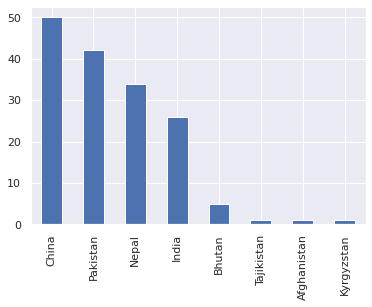

In [ ]:
df_.plot(kind='bar')

▶**All the high mountains are in Asia**

## 4. Visualization

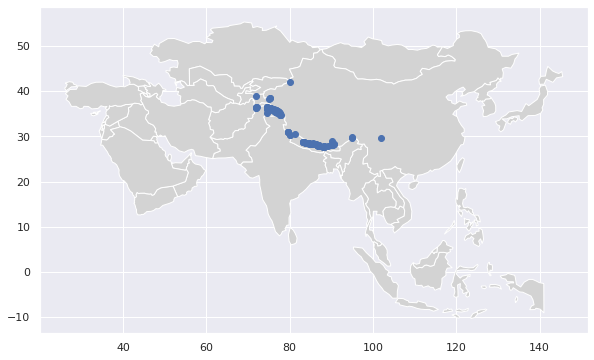

In [ ]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
asia = worldmap.query('continent == "Asia"')
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
asia.plot(color="lightgrey", ax=ax)

# Plotting our Impact Energy data with a color map
x = df['Longitude']
y = df['Latitude']

plt.scatter(x, y)


### Which mountain had the most sucessful attempst?

In [ ]:
df1= df.query('Height_m >8000')
df1[['Mountain_name', 'Height_m','Country', 'Succesful_attempts']][:5]

,Mountain_name,Height_m,Country,Succesful_attempts
0,Mount Everest,8848.0,"[Nepal, China]",145
1,K2,8611.0,"[Pakistan, China]",45
2,Kangchenjunga,8586.0,"[Nepal, India]",38
3,Lhotse,8516.0,"[China, Nepal]",26
4,Makalu,8485.0,"[Nepal, China]",45


In [ ]:
df[['Mountain_name','Succesful_attempts', 'Failed_attempts']].loc[df['Succesful_attempts']==df['Succesful_attempts'].max()]

,Mountain_name,Succesful_attempts,Failed_attempts
0,Mount Everest,145,121


▶*It is no surprise that Mt. Everest has the most successful attempts ( 145) because of the fascination of conquering the tallest mountain on earth and rapid commercialization of Mt. Everest climbs.*




###5. Feature Engineering

- Add columns, 
`total_attempts= Failed_attempts + Success_attempts and also add Percent_success= (success_attempts/total_attempts)*100`

`Percent_success= (success_attempts/total_attempts)*100`


In [ ]:
df['Total_attempts']=df['Failed_attempts']+df['Succesful_attempts']
df['Percent_success']=(df['Succesful_attempts']/df['Total_attempts'])*100
df.head()

,Rank,Mountain_name,Height_m,Height_ft,Prominence_m,Prominence_ft,Range,Coordinates,Parent_mountain,Succesful_attempt_yr,Succesful_attempts,Failed_attempts,Country,Latitude,Longitude,Total_attempts,Percent_success
0,1,Mount Everest,8848.0,29029.0,8848.0,29029.0,"[Mahalangur, Himalaya]",27°59′17″N 86°55′31″E,—,1953,145,121,"[Nepal, China]",27.988056,86.925278,266,54.511278
1,2,K2,8611.0,28251.0,4020.0,13190.0,"[Baltoro, Karakoram]",35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44,"[Pakistan, China]",35.881389,76.513333,89,50.561798
2,3,Kangchenjunga,8586.0,28169.0,3922.0,12867.0,"[Kangchenjunga, Himalaya]",27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24,"[Nepal, India]",27.703333,88.147500,62,61.290323
3,4,Lhotse,8516.0,27940.0,610.0,2000.0,"[Mahalangur, Himalaya]",27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26,"[China, Nepal]",27.961667,86.933056,52,50.0
4,5,Makalu,8485.0,27838.0,2378.0,7802.0,"[Mahalangur, Himalaya]",27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,<NA>,"[Nepal, China]",27.889722,87.088889,<NA>,<NA>


### Let's look at the top 10 mountains success rates before 2004?


In [ ]:
df2=df.query("Rank<11")[[ 'Rank','Mountain_name', 'Percent_success', 'Country']]
df2.sort_values(by='Percent_success', ascending=False)


,Rank,Mountain_name,Percent_success,Country
5,6,Cho Oyu,73.831776,"[China, Nepal]"
2,3,Kangchenjunga,61.290323,"[Nepal, India]"
6,7,Dhaulagiri I,56.666667,[Nepal]
0,1,Mount Everest,54.511278,"[Nepal, China]"
9,10,Annapurna I,52.432432,[Nepal]
7,8,Manaslu,52.12766,[Nepal]
1,2,K2,50.561798,"[Pakistan, China]"
3,4,Lhotse,50.0,"[China, Nepal]"
8,9,Nanga Parbat,43.697479,[Pakistan]
4,5,Makalu,<NA>,"[Nepal, China]"


▶ **9th highest mountain, Nanga Parbat has the least success rate of 43.7%**

### Reference:

1.   https://www.youtube.com/watch?v=ng2o98k983k&t=1106s&ab_channel=CoreySchafer
2.https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
2.   https://medium.com/geekculture/data-exploration-in-python-height-and-weight-of-nhl-players-using-3-methods-bf33c52692ce
3. https://realpython.com/beautiful-soup-web-scraper-python/

### Exporting to CSV:

In [ ]:
#df.drop(['Coordinates'], axis=1)
df.head()


,Rank,Mountain_name,Height_m,Height_ft,Prominence_m,Prominence_ft,Range,Coordinates,Parent_mountain,Succesful_attempt_yr,Succesful_attempts,Failed_attempts,Country,Latitude,Longitude
0,1,Mount Everest,8848.0,29029.0,8848.0,29029.0,"[Mahalangur, Himalaya]",27°59′17″N 86°55′31″E,—,1953,145,121,"[Nepal, China]",27.988056,86.925278
1,2,K2,8611.0,28251.0,4020.0,13190.0,"[Baltoro, Karakoram]",35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44,"[Pakistan, China]",35.881389,76.513333
2,3,Kangchenjunga,8586.0,28169.0,3922.0,12867.0,"[Kangchenjunga, Himalaya]",27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24,"[Nepal, India]",27.703333,88.147500
3,4,Lhotse,8516.0,27940.0,610.0,2000.0,"[Mahalangur, Himalaya]",27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26,"[China, Nepal]",27.961667,86.933056
4,5,Makalu,8485.0,27838.0,2378.0,7802.0,"[Mahalangur, Himalaya]",27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,<NA>,"[Nepal, China]",27.889722,87.088889


In [ ]:
df.to_csv('mountain.csv',index=False)